In [1]:
from helpers import *

from shapely import ops
from graph_checks import *

from convex_boundary import *

In [2]:
from simple_four_con import graph_data

In [3]:
graph_data.G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [36]:
G = copy.deepcopy(graph_data.G)
embed = graph_data.embed

G.remove_nodes_from([2])
G.nodes

NodeView((0, 1, 3, 4, 5, 6, 7))

In [14]:
check_triangulated_interior(G)

In [39]:
cb = ConvexBoundary(GraphData(G, embed))
cb.run()
cb.ext_nodes

[0, 1, 3, 4, 6]

In [41]:
cycles = [g for g in nx.simple_cycles(cb.G_ext._graph) if len(g) == len(cb.ext_nodes)]

assert len(cycles) > 1, "No cycles found with the correct length"

true_cycle  = None
for c in cycles:
    if check_ext_nodes_in_cycle(c):
        true_cycle = c
        ic(c)
        break
assert true_cycle, "True cycle was not found"

# cycles = [g for g in nx.simple_cycles(cb.G_ext._graph) if g == cb.ext_nodes]

cycles

ic| n: 3
ic| c: [0, 1, 3, 4, 6]


[[0, 1, 7, 5, 6],
 [0, 1, 3, 4, 6],
 [0, 1, 3, 5, 6],
 [0, 1, 3, 5, 7],
 [0, 1, 5, 4, 6],
 [0, 1, 5, 6, 7],
 [0, 1, 5, 7, 6],
 [0, 7, 1, 5, 6],
 [0, 7, 5, 4, 6],
 [1, 7, 5, 4, 3],
 [1, 7, 6, 4, 3],
 [1, 7, 6, 4, 5],
 [1, 7, 6, 5, 3],
 [1, 3, 4, 6, 5],
 [7, 5, 3, 4, 6]]

In [7]:
cb.cycle

[0, 7, 5, 3, 4, 6]

In [42]:
cb.G_ext._graph

In [46]:
nx.cycle_basis(cb.G_ext._graph, 0)

[[7, 6, 0], [5, 4, 6], [5, 3, 4], [7, 5, 6]]

In [45]:
nx.find_cycle(cb.G_ext._graph)

[(5, 4), (4, 3), (3, 5)]

In [47]:
cycle = [g for g in nx.simple_cycles(cb.G_ext._graph) if len(g) == len(cb.ext_nodes)]

[[0, 7, 5, 3, 4, 6]]

In [33]:
len(cb.ext_nodes)

6

In [32]:
cb.G_ext

In [8]:
cb.cycle

[5, 4, 3]

In [9]:
cb.ext_nodes

[0, 3, 4, 5, 6, 7]

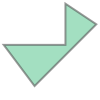

In [10]:
inner_faces = {}
for ix, c in enumerate(nx.simple_cycles(G=G, length_bound=3)):
    inner_faces[ix] = {
        "cycle": c,
        "shape": sp.LinearRing(get_emedding_coords(embed, c)),
    }

complete_faces = sp.MultiPolygon(
            [sp.Polygon(i["shape"]) for i in inner_faces.values()]
        )
boundary_line_string = sp.Polygon(sp.unary_union(complete_faces).boundary)
boundary_line_string

In [11]:
points = sp.MultiPoint([sp.Point(i) for i in get_emedding_coords(embed, G.nodes)])
points_list = [g for g in points.geoms]

In [12]:
points_list

[<POINT (-3 0)>,
 <POINT (3 4)>,
 <POINT (6 2)>,
 <POINT (3 0)>,
 <POINT (0 -4)>,
 <POINT (0 0)>]

In [13]:
list(G.nodes)[-1]

7

In [14]:
ext_nodes = []
for node_index, point in zip(G.nodes, points_list):
    if not boundary_line_string.contains(point):
        # check_node_point_match()
        ext_nodes.append(node_index)
        

In [15]:
G.nodes

NodeView((0, 3, 4, 5, 6, 7))

In [16]:
cb.G.nodes

NodeView((0, 3, 4, 5, 6, 7))

In [17]:
cb.points_list

[<POINT (-3 0)>,
 <POINT (3 4)>,
 <POINT (6 2)>,
 <POINT (3 0)>,
 <POINT (0 -4)>,
 <POINT (0 0)>]

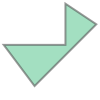

In [18]:
cb.boundary_shape

In [19]:
ext_nodes

[0, 3, 4, 5, 6, 7]

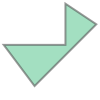

In [20]:
boundary_line_string

In [21]:
nx.find_cycle(G, 0)

[(5, 4), (4, 3), (3, 5)]

In [22]:
points = sp.MultiPoint([sp.Point(i) for i in get_emedding_coords(embed, G.nodes)])
points_list = [g for g in points.geoms]

In [23]:
sp_edges = []
centers = []
around =  []
for e in G.edges:
    line = sp.LineString(get_emedding_coords_as_tuple(embed, (e)))
    sp_edges.append(line)
    centers.append(line.centroid)
    group = [line.coords[0], line.centroid.coords[0], line.coords[1]]
    around.extend(group)


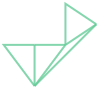

In [24]:
merged_line = ops.linemerge(sp.MultiLineString(sp_edges))
merged_line

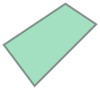

In [25]:
boundary_shape = sp.Polygon(points.convex_hull.boundary)
boundary_shape

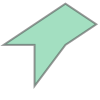

In [26]:
fitted_boundary_shape = sp.Polygon(points_list)
fitted_boundary_shape

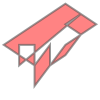

In [27]:
fitted_boundary_shape2 = sp.Polygon(points_list+centers)
fitted_boundary_shape2

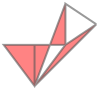

In [28]:
ar = sp.Polygon(around)
ar

In [29]:
[p for p in ar.interiors]

[]

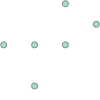

In [30]:
points

In [31]:
# now find cycle that 